In [1]:
from strategy import Strategy
from backtest import Bt
import matplotlib.pyplot as plt
from plot import get_plotly

import pandas as pd
import time

In [9]:
data = pd.read_pickle('sp500.pkl')
data = data[data.symbol == 'AMD']


class Test(Strategy):
    
    def __init__(self):
        self.data = data
        self.init_capital = 100000
        self.ma = self.indicator('MA', [5, 10])

    def signal(self, index):
        
        if (self.ma['5MA'][index] > self.ma['10MA'][index]) & (self.position == 0):
            self.buy()
        if (self.ma['10MA'][index] > self.ma['5MA'][index]) & (self.position > 0):
            self.sell()


class CCI(Strategy):
    def __init__(self):
        self.data = data
        self.init_capital = 100000
        self.cci = self.indicator('CCI')
        print(self.position)
    def signal(self, index):
        
        if (self.cci['CCI'][index] > -100) & (self.cci['CCI'][index - 1] < -100) & (self.position == 0):
            
            self.buy(unit=0.2)
        if (self.cci['CCI'][index] < 100) & (self.cci['CCI'][index - 1] > 100) & (self.position > 0):
            self.sell()
            
            

class CCI_with_sl(Strategy):
    """
    CCI with Stop loss 
    """
    def __init__(self):
        self.data = data
        self.init_capital = 100000
        self.cci = self.indicator('CCI')

    def signal(self, index):
#         print(self.position)
        if (self.cci['CCI'][index] > -100) & (self.cci['CCI'][index - 1] < -100) & (self.position == 0):
            self.buy(stop_loss=0.08)
        if (self.cci['CCI'][index] < 100) & (self.cci['CCI'][index - 1] > 100) & (self.position > 0):
            self.sell()


In [10]:
import time
s = time.time()
log, per = Bt(CCI).run()
e = time.time()
e-s

0
FIFO Process


TypeError: cannot unpack non-iterable Order object

In [4]:
log

BuyDate  BuyPrice  BuyUnits   SellDate  SellPrice  SellUnits  KeepDay  \
0   2000-03-02     20.22         1 2000-03-13      24.16         -1       11   
1   2000-05-12     43.53         1 2000-06-08      45.00         -1       27   
2   2000-07-05     37.50         1 2000-07-21      42.47         -1       16   
3   2000-08-08     32.88         1 2000-08-24      35.12         -1       16   
4   2000-09-20     30.44         1 2000-11-08      22.69         -1       49   
5   2000-12-06     16.19         1 2001-01-09      16.81         -1       34   
6   2001-02-27     22.82         1 2001-03-12      22.75         -1       13   
7   2001-04-06     22.80         1 2001-04-24      27.45         -1       18   
8   2001-05-16     29.10         1 2001-05-24      32.66         -1        8   
9   2001-06-06     29.25         1 2001-07-06      23.50         -1       30   
10  2001-07-13     21.85         1 2001-10-18       9.98         -1       97   
11  2001-11-01     10.00         1 2001-11-12      12.40         -1       11   
12  2001-12-27     15.94         1 2002-01-10      19.20         -1       14   
13  2002-01-29     16.50         1 2002-03-13      14.85         -1       43   
14  2002-03-22     14.65         1 2002-04-19      12.70         -1       28   
15  2002-04-30     11.00         1 2002-05-21      12.35         -1       21   
16  2002-06-14      9.30         1 2002-07-19       8.72         -1       35   
17  2002-07-30      8.12         1 2002-08-14       8.51         -1       15   
18  2002-09-09      8.01         1 2002-10-30       5.93         -1       51   
19  2002-11-22      5.85         1 2002-12-04       7.55         -1       12   
20  2002-12-18      7.00         1 2003-01-09       6.92         -1       22   
21  2003-01-29      5.30         1 2003-02-24       5.49         -1       26   
22  2003-05-28      7.20         1 2003-07-14       7.47         -1       47   
23  2003-10-02     11.23         1 2003-10-17      14.55         -1       15   
24  2003-12-15     15.80         1 2004-01-12      15.70         -1       28   
25  2004-02-09     15.01         1 2004-02-13      15.25         -1        4   
26  2004-02-26     14.60         1 2004-03-09      14.71         -1       12   
27  2004-03-17     15.02         1 2004-03-22      15.05         -1        5   
28  2004-04-23     16.60         1 2004-06-03      14.95         -1       41   
29  2004-06-24     15.40         1 2004-07-02      15.50         -1        8   
..         ...       ...       ...        ...        ...        ...      ...   
104 2015-08-20      1.79         1 2015-09-11       1.88         -1       22   
105 2015-10-01      1.77         1 2015-10-13       1.87         -1       12   
106 2015-11-18      1.99         1 2015-12-01       2.36         -1       13   
107 2016-01-13      2.40         1 2016-03-09       2.32         -1       56   
108 2016-04-11      2.76         1 2016-04-29       3.69         -1       18   
109 2016-09-15      6.09         1 2016-10-06       6.72         -1       21   
110 2016-10-17      6.92         1 2016-11-01       7.32         -1       15   
111 2016-11-14      6.83         1 2016-11-25       8.80         -1       11   
112 2017-01-24      9.95         1 2017-02-13      13.70         -1       20   
113 2017-04-19     13.09         1 2017-05-01      13.43         -1       12   
114 2017-05-10     10.46         1 2017-06-13      12.33         -1       34   
115 2017-08-08     13.48         1 2017-09-06      13.02         -1       29   
116 2017-11-03     10.95         1 2017-12-26      10.38         -1       53   
117 2018-02-13     11.60         1 2018-03-01      12.26         -1       16   
118 2018-03-19     11.41         1 2018-04-20      10.05         -1       32   
119 2018-06-27     15.65         1 2018-07-12      16.41         -1       15   
120 2018-07-27     19.07         1 2018-08-02      18.17         -1        6   
121 2018-10-15     26.38         1 2018-12-03      22.48         -1       49   
122 201

In [12]:
log.tail(20)

BuyDate  BuyPrice  BuyUnits   SellDate  SellPrice  SellUnits  KeepDay  \
91  2016-09-02     25.41         1 2016-09-21      26.86         -1       19   
92  2016-11-08     26.16         1 2016-11-25      26.36         -1       17   
93  2017-04-21     33.93         1 2017-04-27      34.28         -1        6   
94  2017-06-20     35.13         1 2017-07-24      36.02         -1       34   
95  2017-09-18     38.45         1 2017-10-20      37.61         -1       32   
96  2017-12-01     40.96         1 2017-12-21      41.97         -1       20   
97  2018-01-03     41.58         1 2018-01-23      42.73         -1       20   
98  2018-02-02     40.00         1 2018-02-22      41.57         -1       20   
99  2018-03-27     42.03         1 2018-04-20      41.28         -1       24   
100 2018-05-01     40.27         1 2018-05-14      45.91         -1       13   
101 2018-06-27     44.99         1 2018-07-12      46.04         -1       15   
102 2018-09-21     53.82         1 2018-10-05      55.57         -1       14   
103 2018-10-15     53.91         1 2019-01-29      38.22         -1      106   
104 2019-05-17     46.10         1 2019-06-17      47.57         -1       31   
105 2019-08-09     49.83         1 2019-08-26      50.96         -1       17   
106 2019-12-05     65.50         1 2019-12-10      66.69         -1        5   
107 2020-02-05     80.33         1 2020-02-10      78.19         -1        5   
108 2020-03-03     75.58         1 2020-04-20      69.18         -1       48   
109 2020-07-28     94.20         1 2020-08-10     112.60         -1       13   
110 2020-09-15    118.33         1 2020-10-05     113.91         -1       20   

     profit(元)      成本  報酬率(%)  累積報酬率(%)  MDD(%)   累計淨值(元)  
91        1.45   25.41   5.706     2.043   4.510  102043.0  
92        0.20   26.16   0.765     2.824   4.789  102824.0  
93        0.35   33.93   1.032     3.885   0.581  103885.0  
94        0.89   35.13   2.533     6.517   2.336  106517.0  
95       -0.84   38.45  -2.185     4.189   5.113  104189.0  
96        1.01   40.96   2.466     6.759   1.176  106759.0  
97        1.15   41.58   2.766     9.711   1.250  109711.0  
98        1.57   40.00   3.925    14.018   4.539  114018.0  
99       -0.75   42.03  -1.784    11.984   7.025  111984.0  
100       5.64   40.27  14.005    27.667   0.631  127667.0  
101       1.05   44.99   2.334    30.647   1.703  130647.0  
102       1.75   53.82   3.252    34.895   3.359  134895.0  
103     -15.69   53.91 -29.104    -4.365  35.937   95635.0  
104       1.47   46.10   3.189    -1.315   8.056   98685.0  
105       1.13   49.83   2.268     0.923   4.711  100923.0  
106       1.19   65.50   1.817     2.757   1.399  102757.0  
107      -2.14   80.33  -2.664     0.020   1.362  100020.0  
108      -6.40   75.58  -8.468    -8.450  25.883   91550.0  
109      18.40   94.20  19.533     9.432   2.278  109432.0  
110      -4.42  118.33  -3.735     5.345   7.449  105345.0

/Users/apple/Documents/PythonProject/alphabt/plot.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/apple/Documents/PythonProject/alphabt/plot.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



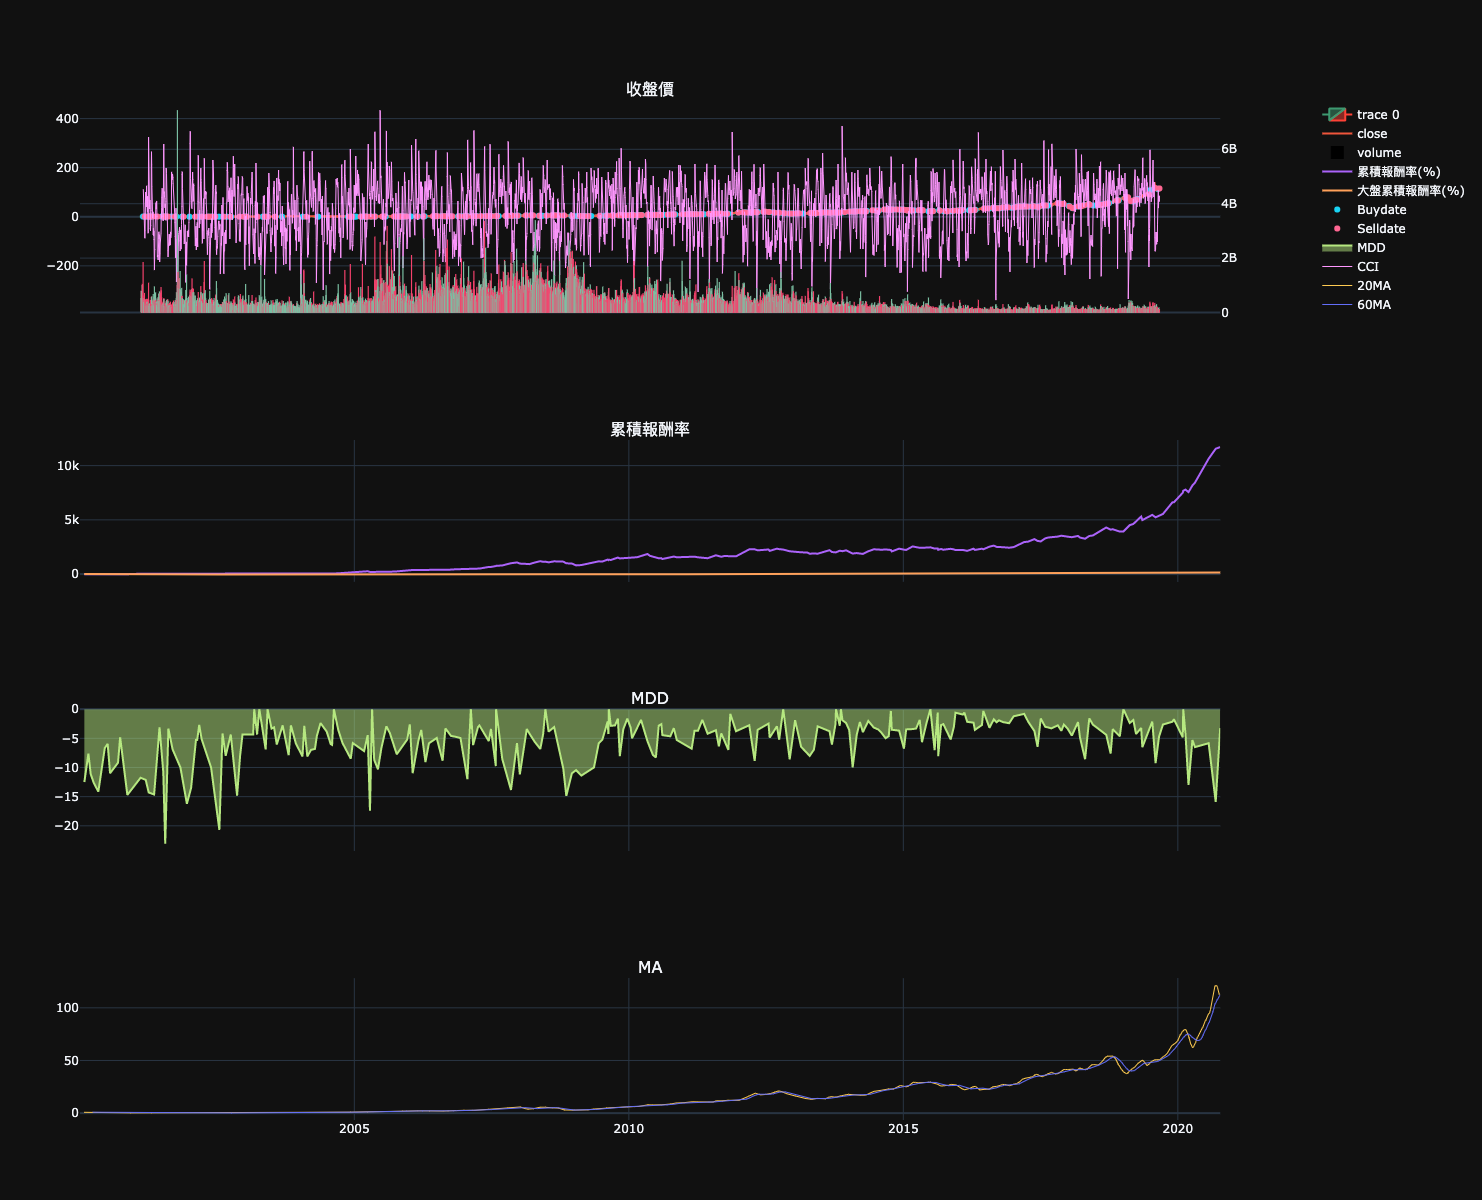

In [5]:
Bt(Test).get_plot(subplot_technical_index=['MA'], overlap=['CCI'], sub_plot_param={'MA':[20, 60]}, overlap_param=None, log=log)


In [7]:
_a = [1,2,3,4,5]
for i in _a[::-1]:
    print(i)

5
4
3
2
1


TypeError: 'builtin_function_or_method' object is not subscriptable